# Text Preprocessing with Keras

In [3]:
!pip install tensor-sensor

  Preparing metadata (setup.py) ... done
  Created wheel for tensor-sensor: filename=tensor_sensor-1.0-py3-none-any.whl size=26897 sha256=798ad76dd51897bed79a797dc641812e68fcee8bebf0e91a45199ec6dee42624
  Stored in directory: /Users/ravishankarkushwaha/Library/Caches/pip/wheels/cc/96/59/872b1f1957b3c703a22e0f48e014a9be3f8a1298be6e7974ae
Successfully built tensor-sensor


In [21]:
# importing libraries
import warnings

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D
import tsensor
import numpy as np

import matplotlib.pyplot as plt

# Change the font to a common one
plt.rcParams['font.family'] = 'DejaVu Sans'


## Tokenization

In [5]:
# Tokenising sentences

sentences = [
    'The quick brown fox jumps over the lazy dog.'
]

tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)

In [6]:
tokenizer.word_index

{'the': 1,
 'quick': 2,
 'brown': 3,
 'fox': 4,
 'jumps': 5,
 'over': 6,
 'lazy': 7,
 'dog': 8}

In [8]:
train_sequence = tokenizer.texts_to_sequences(sentences)
train_sequence = np.array(train_sequence)
print(train_sequence)

[[1 2 3 4 5 6 1 7 8]]


## Creating Embedding Layer

In [11]:
# Create a random embedding layer

embedding = Embedding(input_dim=len(train_sequence[0]), output_dim=128)

In [12]:
# Get the embeddings of the train sample

train_sample = embedding(train_sequence)

In [13]:
train_sequence.shape

(1, 9)

In [14]:
train_sample.shape

TensorShape([1, 9, 128])

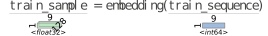

In [22]:
with tsensor.explain(fontname='DejaVu Sans', dimfontname='DejaVu Sans'):
    train_sample = embedding(train_sequence)

In [23]:
train_sample[0]

<tf.Tensor: shape=(9, 128), dtype=float32, numpy=
array([[-0.03529771, -0.03779429,  0.00358965, ...,  0.02016491,
         0.03949806,  0.01176916],
       [-0.03123136,  0.02677375, -0.00120077, ..., -0.03706748,
         0.03190506, -0.0229617 ],
       [-0.0193996 ,  0.02582332,  0.00641924, ..., -0.03318403,
         0.03907238, -0.02185298],
       ...,
       [-0.03529771, -0.03779429,  0.00358965, ...,  0.02016491,
         0.03949806,  0.01176916],
       [ 0.03274402,  0.01569804, -0.00062752, ...,  0.0442952 ,
        -0.02186885,  0.00676197],
       [ 0.00384855, -0.03104253, -0.01882268, ...,  0.03470676,
        -0.02256216,  0.00737251]], dtype=float32)>

# Averaging across tokens

In [25]:
GlobalAveragePooling1D()(train_sample)

<tf.Tensor: shape=(1, 128), dtype=float32, numpy=
array([[-6.76167663e-03, -1.65199544e-02, -5.55542437e-03,
        -9.20796592e-05,  1.40998894e-02,  1.39368605e-02,
         1.72880664e-02,  1.20137841e-03, -1.21023767e-02,
         8.53146333e-03,  1.19031221e-02, -9.93899163e-03,
         2.42570159e-03,  9.11630038e-03,  6.27182657e-03,
         9.41651687e-03, -4.95228032e-03,  1.66315809e-02,
         9.00038402e-04,  8.88234563e-03,  6.54966058e-03,
         1.89404620e-03, -7.58653786e-03, -1.71825162e-03,
         8.28125142e-03, -2.94156577e-02, -8.74881912e-03,
        -1.26022883e-02, -9.95733030e-03, -1.45675801e-02,
         2.58149323e-03,  1.02914022e-02, -1.21997353e-02,
         6.02159090e-03, -1.62862651e-02, -1.82306543e-02,
        -9.34096146e-03, -2.83510471e-03, -1.57436281e-02,
        -1.02361226e-02,  7.07041472e-03, -1.62879378e-02,
        -1.85209850e-04, -2.00347286e-02,  7.95689598e-03,
         2.43741181e-03, -3.84100201e-03,  1.01417648e-02,
      

## <center>Global Average Pooling</center>

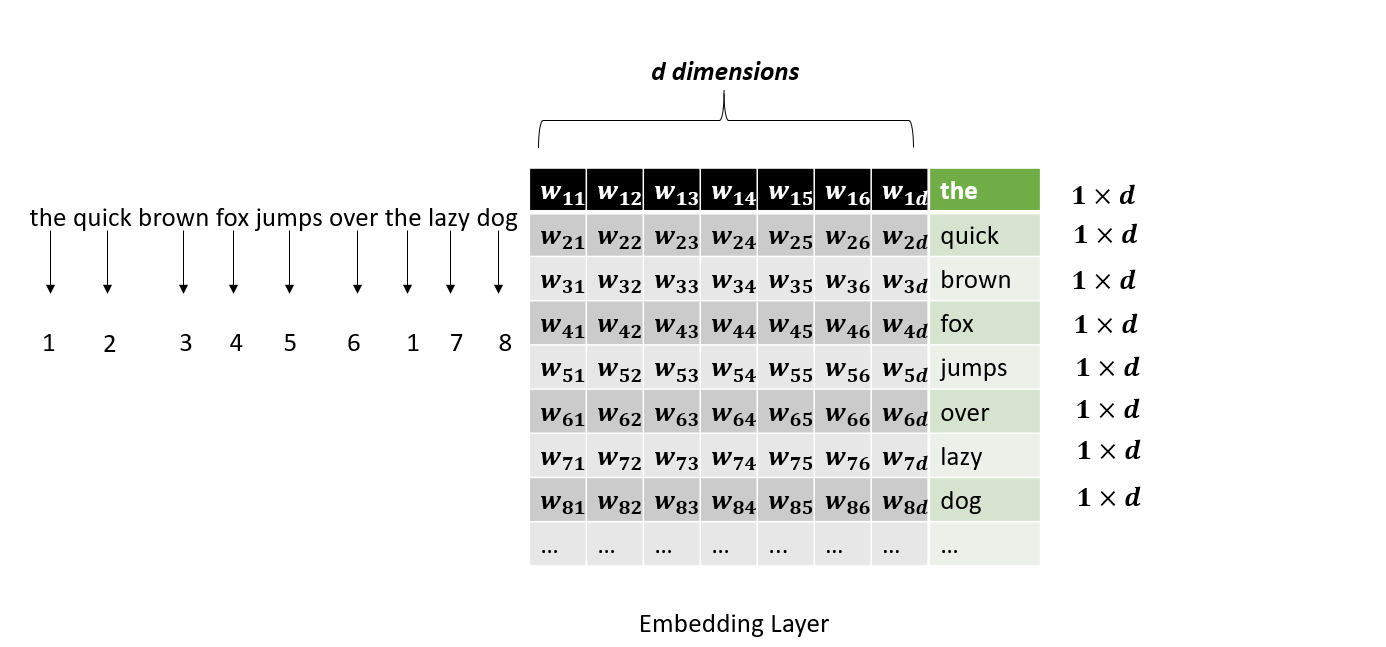

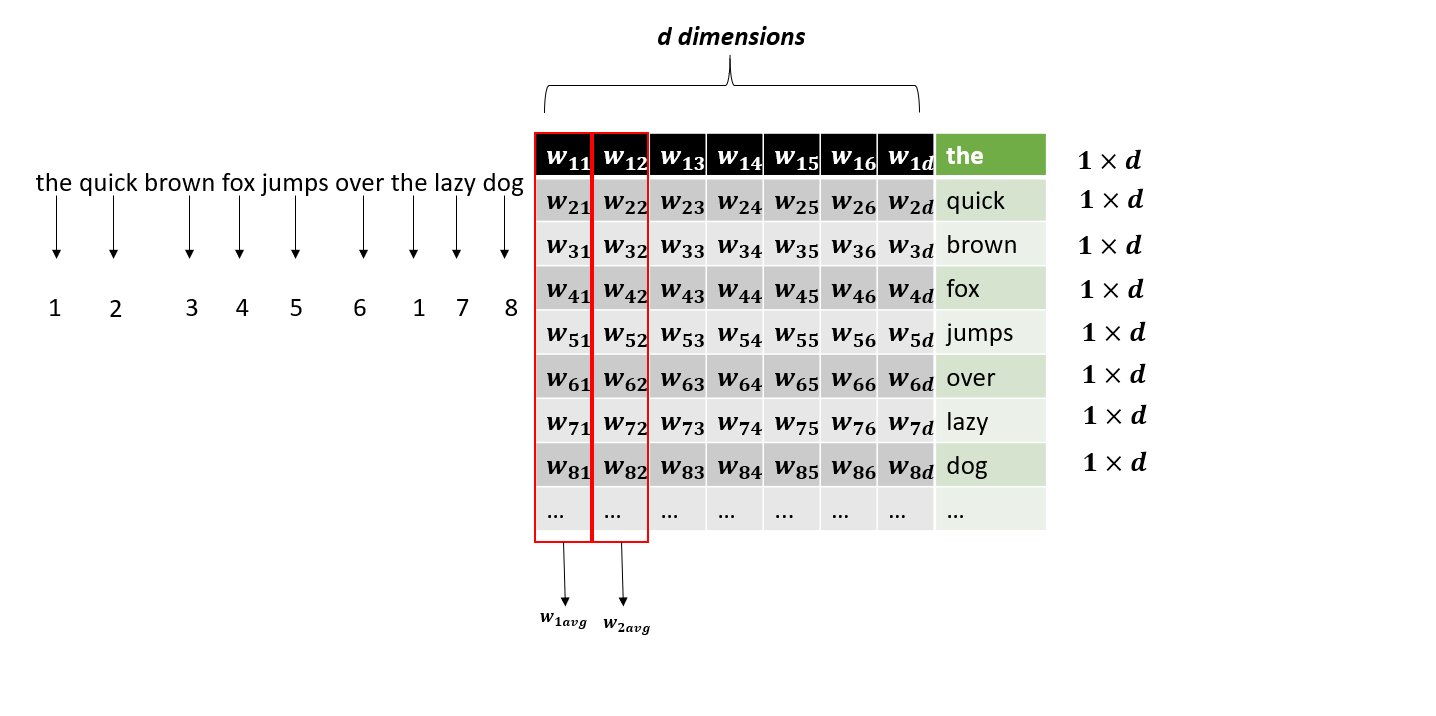

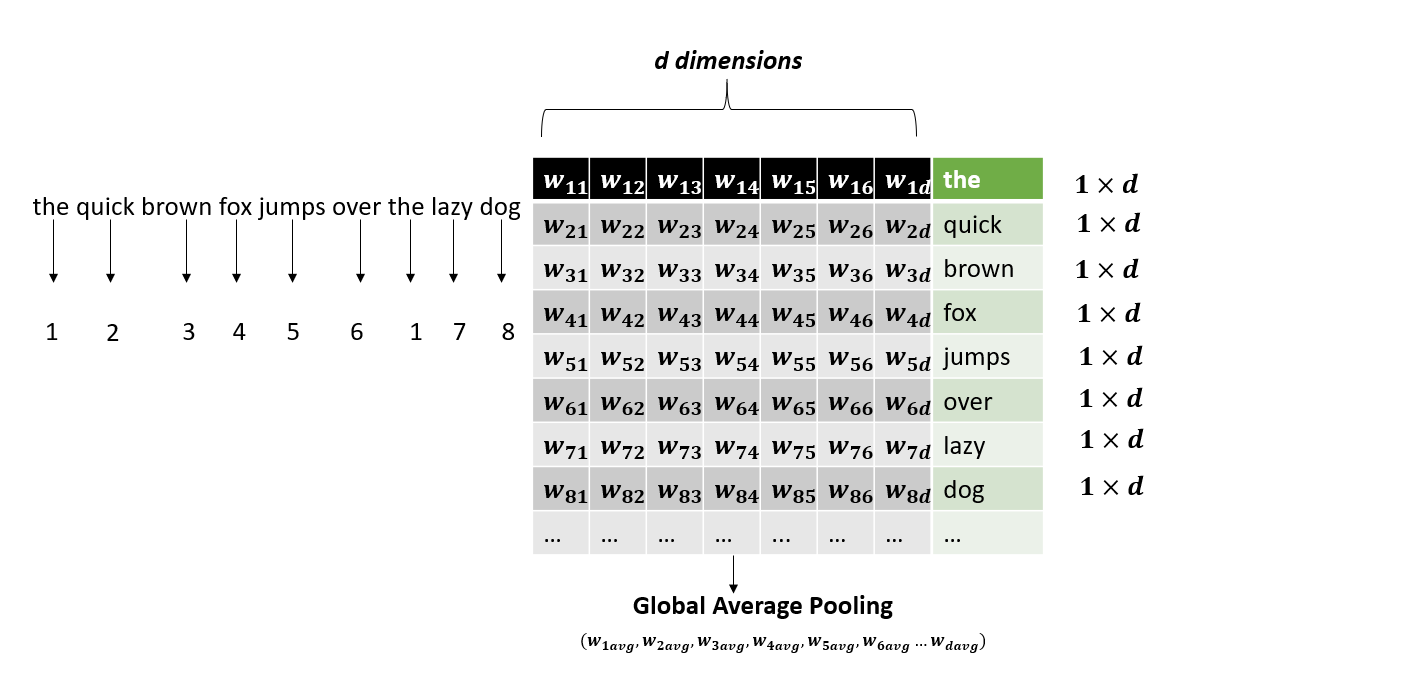

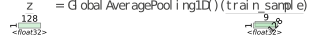

In [28]:
with tsensor.explain(fontname='Sans', dimfontname='Sans'):
    z = GlobalAveragePooling1D()(train_sample)

## Creating word Embeddings for more than one sentence

In [30]:
# More than one sentence

test_corpus = [
    'The quick brown fox jumps over the lazy dog.',
    'The quick brown fox.',
    'The lazy dog.',
    'The dog.',
    'dog and the fox,',
    'Hello, world!'
]
encoded_sentences = tokenizer.texts_to_sequences(test_corpus)
for sentence, encoded_sentence in zip(test_corpus, encoded_sentences):
    print(sentence, encoded_sentence)

The quick brown fox jumps over the lazy dog. [1, 2, 3, 4, 5, 6, 1, 7, 8]
The quick brown fox. [1, 2, 3, 4]
The lazy dog. [1, 7, 8]
The dog. [1, 8]
dog and the fox, [8, 1, 4]
Hello, world! []


## Padding Sequences

In [31]:
# Length of each sentence in the corpus

[len(sentence) for sentence in encoded_sentences]

[9, 4, 3, 2, 3, 0]

In [32]:
MAX_SEQUENCE_LENGTH = 9

In [34]:
# Padding sequences that are shorter than the longest sequence

X = pad_sequences(encoded_sentences, maxlen=MAX_SEQUENCE_LENGTH)
X

array([[1, 2, 3, 4, 5, 6, 1, 7, 8],
       [0, 0, 0, 0, 0, 1, 2, 3, 4],
       [0, 0, 0, 0, 0, 0, 1, 7, 8],
       [0, 0, 0, 0, 0, 0, 0, 1, 8],
       [0, 0, 0, 0, 0, 0, 8, 1, 4],
       [0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int32)

## Embedding Layer

In [36]:
# Training data with more than 1 sentences

X.shape

(6, 9)

In [38]:
# Embeddings of the larger corpus

X_embedded = embedding(X)

In [39]:
X_embedded.shape

TensorShape([6, 9, 128])

In [40]:
X_embedded

<tf.Tensor: shape=(6, 9, 128), dtype=float32, numpy=
array([[[-0.03529771, -0.03779429,  0.00358965, ...,  0.02016491,
          0.03949806,  0.01176916],
        [-0.03123136,  0.02677375, -0.00120077, ..., -0.03706748,
          0.03190506, -0.0229617 ],
        [-0.0193996 ,  0.02582332,  0.00641924, ..., -0.03318403,
          0.03907238, -0.02185298],
        ...,
        [-0.03529771, -0.03779429,  0.00358965, ...,  0.02016491,
          0.03949806,  0.01176916],
        [ 0.03274402,  0.01569804, -0.00062752, ...,  0.0442952 ,
         -0.02186885,  0.00676197],
        [ 0.00384855, -0.03104253, -0.01882268, ...,  0.03470676,
         -0.02256216,  0.00737251]],

       [[-0.03898057,  0.04726971,  0.01278177, ...,  0.00940704,
          0.03926026, -0.03316246],
        [-0.03898057,  0.04726971,  0.01278177, ...,  0.00940704,
          0.03926026, -0.03316246],
        [-0.03898057,  0.04726971,  0.01278177, ...,  0.00940704,
          0.03926026, -0.03316246],
        ...,
 

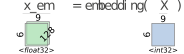

In [41]:
with tsensor.explain(fontname='Sans', dimfontname='Sans'):
    x_em = embedding(X)

In [42]:
X.shape

(6, 9)

In [43]:
x_em.shape

TensorShape([6, 9, 128])

## Averaging across tokens

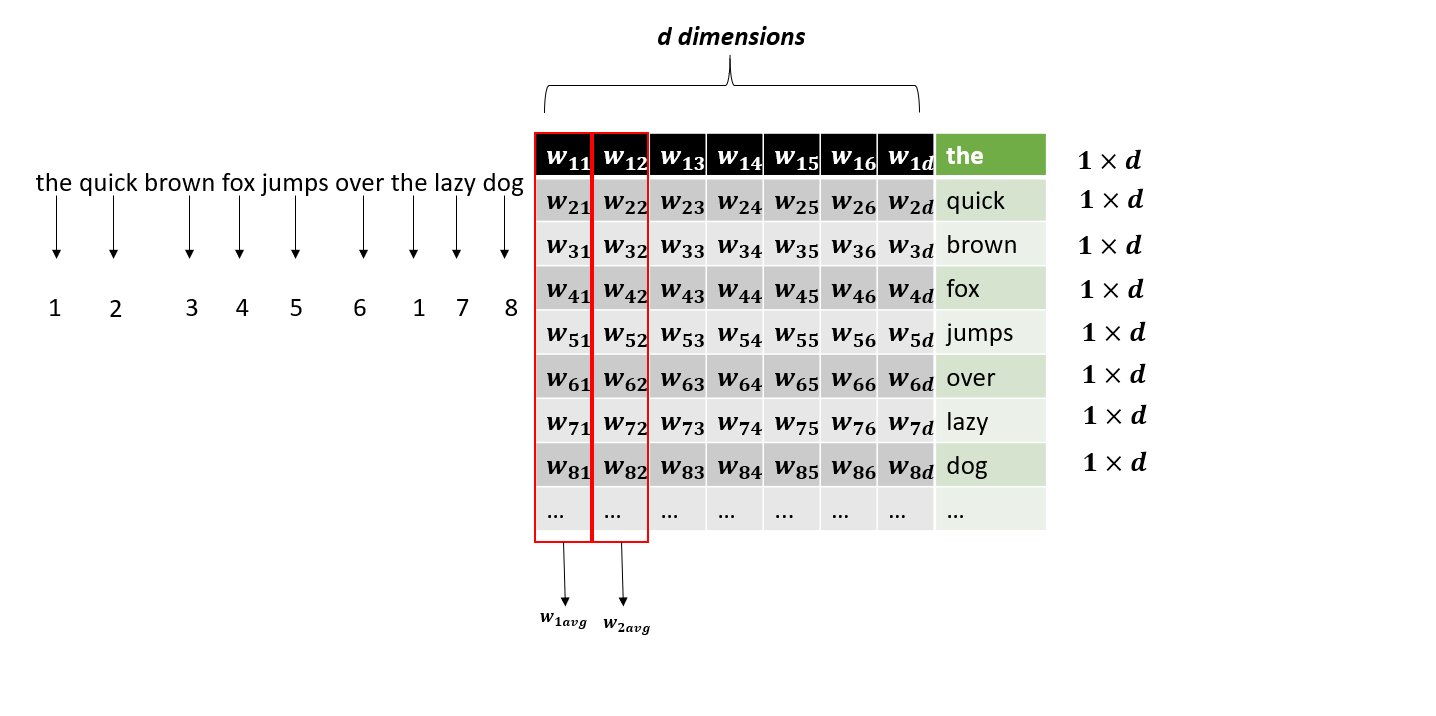

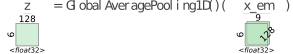

In [45]:
with tsensor.explain(fontname='Sans', dimfontname='Sans'):
    z = GlobalAveragePooling1D()(x_em)

In [46]:
z.shape

TensorShape([6, 128])